## CHEME 5660:  Microscopic Perspective of Financial Systems

<!-- <img src="./figs/saupload_15-04-22-flash-crash.png" style="margin:auto; width:30%"/> -->

### Motivation
In previous weeks, we have treated financial markets as a *macroscopic* system, where the overall market behavior can be simulated using various equation-based methods. These models provide us with a way to relate features, such as implied volatility and the risk-free rate of return, to a distribution of price over time. These methods are well-established for supporting financial decision-making—but, as with all models, they come with limitations. Among them, is the difficulty extending their use to beyond the view of a single asset and modeling extreme events.


Financial markets are not governed by a central mathematical process. Instead, they are composed of complex and evolving interactions that are difficult to define. Systems that exhibit these kinds of dynamics are known as *Complex adaptive systems* (CAS), in which the micro-scale behaviors of individual actors or agents coalesce to generate *emergent properties* at the macro-scale. In financial systems, emergent properties can manifest unexpectedly and have varying consequences. One example of emergence is the price discovery process, in which the price series of an asset is determined through the individual orders submitted by various buyers and sellers. Other types of emergent phenomena can be irrational and deviate significantly from historical events, such as the *flash crash*. A flash crash is a sudden and extreme drop in asset value that can have lingering and widespread effects on the market.
<br/><br/>
<figure>
    <img src="./figs/saupload_15-04-22-flash-crash.png" style="margin:auto; width:60%"/>
    <figcaption class="figure-caption text-center">Image source: Rueters (2015)</figcaption>
</figure>
<br/><br/>

**Why does this matter?**
- Investor confidence
    - Market's ability to fairly price assets
    - Adverse selection
    - Transparency
- Market Stability
    - Extreme volatility
    - Risk posed by algorithmic trading

Flash crashes and other emergent phenomena can be traced back to the accumulation of individual decisions and the environment they occur in—the market microsructure. 

### Market Microstructure
Market microstructure examines the explicit trading rules and mechanisms of exchanges and the effects they have on market outcomes and trading behavior. Briefly, let's introduce two key components of market microstructure:

- **Electronic exchanges (Networks and Order types)**
    - Electronic exchanges are virtual platforms that facilitate trades for market participants. There are several venues where trade execution can take place and orders can be submitted over a network from anywhere; therefore, latency plays a role in the outcome of a trade. 
    - Exchanges offer investors a choice of several order types (e.g., limit orders, market orders, cancel orders, etc.), which allow orders to be submitted passively or aggressively. 
- **Order Books (Matching Algorithms and Liquidity)**
    - Order books represent the queue of pending orders for a particular asset and match orders based on a matching algorithm (typically price-time priority).
    - Physical representation of supply and demand: buyers submit *bids* and sellers submit *asks*. The difference between the best bid and best ask is known as the *bid/ask spread*. Order books capture the supply and demand forces that drive price movement and contain information such as the market's sentiment of an asset.
    - *Liquidity* is the measure of how easy it is to carry out a transaction at a stable price; illiquid assets have sparse order books with a wide bid-ask spread. Market makers provide liquidity by maintaining concurrent offers to carry out transactions between both buyers and sellers.
- For more information, view the online book chapter over [Markets, Exchanges and Investment Instruments](https://varnerlab.github.io/CHEME-5660-Markets-Mayhem-Book/chapter-1-dir/markets.html#markets-exchanges-and-investment-instruments).

**Why does this matter?**
- Market participants have different goals
    - Market maker vs. retail investor
- Execution workflows
    - Market impact
    - Market slippage
    
### Order book demo
Let's run through a demo of key microstructural features. 
1. Limit Order vs. Market Order
2. Liquid asset vs. illiquid asset
3. Market impact
4. Market slippage

### Lab setup: LOB
The code block below installs (and loads) any [Julia](https://julialang.org) packages that we need to complete the calculations. 

In [1]:
import Pkg; Pkg.activate("."); Pkg.resolve(); Pkg.instantiate();

  Activating project at `~/Desktop/julia_work/CHEME-5660-Markets-Mayhem-Example-Notebooks/labs/lab-4-Agent-Based-Modelling-Market-Microstructure`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Markets-Mayhem-Example-Notebooks/labs/lab-4-Agent-Based-Modelling-Market-Microstructure/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Markets-Mayhem-Example-Notebooks/labs/lab-4-Agent-Based-Modelling-Market-Microstructure/Manifest.toml`


In [2]:
Pkg.add(url="https://github.com/aaron-wheeler/SFIArtificialStockMarket.jl")
Pkg.add(url="https://github.com/Renruize12306/VL_LimitOrderBook")

    Updating git-repo `https://github.com/aaron-wheeler/SFIArtificialStockMarket.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-5660-Markets-Mayhem-Example-Notebooks/labs/lab-4-Agent-Based-Modelling-Market-Microstructure/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Markets-Mayhem-Example-Notebooks/labs/lab-4-Agent-Based-Modelling-Market-Microstructure/Manifest.toml`
    Updating git-repo `https://github.com/Renruize12306/VL_LimitOrderBook`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-5660-Markets-Mayhem-Example-Notebooks/labs/lab-4-Agent-Based-Modelling-Market-Microstructure/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Markets-Mayhem-Example-Notebooks/labs/lab-4-Agent-Based-Modelling-Market-Microstructure/Manifest.toml`


In [3]:
using VL_LimitOrderBook
using Dates
using Base.Iterators: zip,cycle,take,filter

In [4]:
# generate Limit Order Book

# define types for Order Size, Price, Transcation ID, Account ID, Order Creation Time, IP Address, Port
MyUOBType = UnmatchedOrderBook{Int64, Float64, Int64, Int64, DateTime, String, Integer}
# define types for Order Size, Price, Order IDs, Account IDs
MyLOBType = OrderBook{Int64, Float64, Int64, Int64}

ob = MyLOBType() # Initialize empty order book
uob = MyUOBType() # Initialize unmatched book process

# define initialization methods
rand_spread() = ceil(-0.05*log(rand()),digits=2)
rand_side() = rand([BUY_ORDER,SELL_ORDER])

# fill book with random orders
for i=1:20
    # add some limit orders
    submit_limit_order!(ob,uob,111,BUY_ORDER,99.0-rand_spread(),rand(5:5:20),10101)
    submit_limit_order!(ob,uob,222,SELL_ORDER,99.0+rand_spread(),rand(5:5:20),10101)
    if (rand() < 0.1) # and some market orders
        submit_market_order!(ob,rand_side(),rand(10:25:150))
    end
end

ob # show state of the book

OrderBook{Sz=Int64,Px=Float64,Oid=Int64,Aid=Int64} with properties:
  ⋄ best bid/ask price: (98.99, 99.02)
  ⋄ total bid/ask volume: (230, 145)
  ⋄ total bid/ask orders: (20, 16)
  ⋄ flags = [:PlotTickMax => 5]

 Order Book histogram (within 5 ticks of center):

                                                            
             98.91 ■■■■■■■■■■■■■ 20                         
             98.94 ■■■■■■■■■■■■■ 20                         
   :BID      98.95 ■■■■■■■■■■■■■■■■■■■■■■■ 35               
             98.96 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 55  
             98.99 ■■■■■■■■■■■■■ 20                         
                                                            

                                                            
             99.02 ■■■■■■■■■■■■■■■■■■ 15                    
             99.03 ■■■■■■■■■■■■■■■■■■■■■■■■ 20              
   :ASK      99.04 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 30  
             99.05 ■■■■■■ 5                                 
    

In [5]:
# interact with LOB

order_id = 1
side = BUY_ORDER # SELL_ORDER
limit_price = 98.99
order_size = 10
acct_id = 1

submit_limit_order!(ob,uob,order_id,side,limit_price,order_size,acct_id)
# submit_market_order!(ob,side,order_size)

ob # show state of the book

OrderBook{Sz=Int64,Px=Float64,Oid=Int64,Aid=Int64} with properties:
  ⋄ best bid/ask price: (98.99, 99.02)
  ⋄ total bid/ask volume: (240, 145)
  ⋄ total bid/ask orders: (21, 16)
  ⋄ flags = [:PlotTickMax => 5]

 Order Book histogram (within 5 ticks of center):

                                                            
             98.91 ■■■■■■■■■■■■■ 20                         
             98.94 ■■■■■■■■■■■■■ 20                         
   :BID      98.95 ■■■■■■■■■■■■■■■■■■■■■■■ 35               
             98.96 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 55  
             98.99 ■■■■■■■■■■■■■■■■■■■■ 30                  
                                                            

                                                            
             99.02 ■■■■■■■■■■■■■■■■■■ 15                    
             99.03 ■■■■■■■■■■■■■■■■■■■■■■■■ 20              
   :ASK      99.04 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 30  
             99.05 ■■■■■■ 5                                 
    

What if we wanted to represent and analyze the complexities of the entire trade lifecycle *in silico*? Could we account for the details and nuances that come with microstructural features? One approach would be to use Agent-Based Modeling (ABM), a broad simulation framework for complex systems. 

### Agent-Based Modeling
Agent-Based Modeling is a simulation paradigm with three design elements:
1. **Software agents.** Agents are entities that act autonomously and according to pre-defined rules and objectives. The agents can be heterogenous, i.e., they can be defined with different properties and exhibit fundamentally different behaviors.
2. **Interaction mechanism.** Agents interact with one another through both their rules (actions they are allowed to take) and the explicit structure to which they are linked.
3. **Environment.** The environment defines the state of the system. This includes the observable variables, external shocks to the system, etc. 

ABMs capture key features of complex systems—in particular, emergent properties, non-linearity, and heterogeneity. These features arise naturally as a result of the micro-scale interactions; that is, macroscopic properties of the system emerge without being explicity constrained, or under any assumption, to do so. To generate realistic behavior, ABMs typically undergo both a calibration and validation procedure. To calibrate the model, model parameters are configured by heuristic methods, initializing the model with empirical microscopic data, etc. To validate the model, statistical test can be run on the outputs and measured against what is known about the system, or the outputs can be measured against empirical macroscopic data. 

**How are financial ABMs useful?**
- Capturing features of systems that conventional modeling does not permit
    - Emergence, complexity, non-equilibrium, heterogeneity
    - Model microstructure effects
- Tunable simulation environment
    - Investigate extreme events
    - Generate synthetic datasets

### Example: Sante Fe Institute Artificial Stock Market
Let's walk through an example ABM, the SFI Artificial Stock Market (SFI-ASM) by LeBaron et al.:

* [LeBaron, Blake, W. Brian Arthur, and Richard Palmer. "Time series properties of an artificial stock market." Journal of Economic Dynamics and control 23, no. 9 (1999): 1487-1516.](https://www.sciencedirect.com/science/article/abs/pii/S0165188998000815)

#### SFI Artificial Stock Market (SFI-ASM)  model
The SFI-ASM was developed in the 1990's and was one of the first agent-based financial market platforms. The SFI-ASM has the following ABM structure:
1. **Software agents.** A collection of `N` agents make trading decisions based on their prediction of the next time period $t$ stock price $p_t$ & dividend $d_t$. Each agent $i$ uses predictions that are given by an evolving set of trading strategies, "predictors", which makes the agents heterogenous. The "predictors" are activated depending on the market state and are selected based on how well they have performed in the past. 
2. **Interaction mechanism.** Agents interact with one another by sending their "demand" $X_{i,t} (p_t)$ (desired number of share holdings) to the "Specialist" who attempts to match buy and sell orders and set a clearing price to close the trading round.
3. **Environment.** The simulation runs in discrete time steps $t$ = {0, 1, 2,.., $T$} and provides the agents with two options: place their cash in a risky asset that pays a dividend $d_t$ or a bank account with a constant riskless return `r`. The history of past prices and dividends is observable to the agents, along with the current dividend, which is published at the beginning of each time step. The dividends are generated by a random process unknown to the agents.

The set of "predictors" $J$, unique to each agent, works by forming a linear function of the expected price + dividend:

$$\hat{E}_t (p_{t+1}+d_{t+1}) = a_{j}(p_t+d_t)+b_{j}$$

where $a$ and $b$ are unique to individual predictor $j$ and are subject to change over time. The accuracy, or prediction variance, of each predictor is updated each time step according to an exponentially weighted average of squared forecast error with horizon length `τ`. 

In this model, the dividend is determined by an [AR(1) process](https://en.wikipedia.org/wiki/Autoregressive_model) and the total amount of shares issued is equal to the number of agents `N`. Thus, for each trading round, the "Specialist" must balance the total demand to the fixed supply of shares and converge to a clearing price according to the following expression:

$$\sum_{i=1}^{N} X_{i,t}(p_t) = \sum_{i=1}^{N} \frac{a_{i,j}(p_t+d_t)+b_{i,j}-p_t(1+r)}{\lambda \hat{\sigma}_{i,j,t}^2} = N$$

where `𝜆` represents an agent's risk aversion and $\sigma^2$ denotes the variance given by the selected "predictor" $j$. The above expression demonstrates how each agent's "demand" $X_{i,t} (p_t)$ reflects an objective to maximize their [expected utility of wealth](https://en.wikipedia.org/wiki/Expected_utility_hypothesis). 

At every time step, each agent $i$ with probability $P_k$ will update their set of predictors via a genetic algorithm. For each agent, this learning procedure takes place every `k` steps on average and replaces the $a$ and $b$ parameters of the lowest performing predictors. 

The learning rate `k` and relevant forecast time horizon `τ` are crucial design parameters. They dictate how often agents adapt and how sharp the adjustments are. 

### Lab setup: SFI-ASM
The code block below loads any [Julia](https://julialang.org) packages that we need to complete the calculations. 

In [6]:
using SFIArtificialStockMarket
using DataFrames
using CSV
using Statistics
using Dates
using Random
using Plots
using StatsPlots
using Distributions

### Model Calibration
For this model, the calibration procedure entails estimating values for model parameters and running the simulation until steady state is reached. We will adopt the model parameters estimated by the heuristic method described in the following paper:

* [Arthur, W. Brian, John H. Holland, Blake LeBaron, Richard G. Palmer, and Paul Tayler. "Asset pricing under endogenous expectations in an artificial stock market." Available at SSRN 2252 (1996).](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2252)

#### a) Estimate model parameters for ABM
As given by the provided references, the parameters of the SFI-ASM take on the following values:
- Number of agents/shares `N` $= 25$. The agents are initialized with a cash balance of $\$20,000$ and one share each.
- The risk-free rate of return `r` $= 10\%$
- The degree of agents' risk-aversion `𝜆` $= 0.5$
- The learning rate `k` $= 250$.
- The corrective forecast horizon length `τ` $= 75$.
- Range of parameters $a$ = [0.7,1.2], $b$ = [-10.0,19.0]

Using these values, the model reaches steady-state after ~$T=250,000$ time steps.

#### b) Run the simulation
Now, let's run the model until we reach steady-state and then continue running it for an additional $10,000$ time steps. Then, we'll plot the results and see how the simulation performed. 

In [7]:
# run simulation trial

Random.seed!(44801)
N_agents = 25
risk_tol = 0.5
warm_up_t = 250000 
SS_t = 10000
k = 250
horizon = 75

adf, mdf = SFI_run(N_agents, risk_tol, warm_up_t, SS_t, k, horizon; print_msg=true);

Market State Initiated
Agents Initiated
10000 time steps passed
20000 time steps passed
30000 time steps passed
40000 time steps passed
50000 time steps passed
60000 time steps passed
70000 time steps passed
80000 time steps passed
90000 time steps passed
100000 time steps passed
110000 time steps passed
120000 time steps passed
130000 time steps passed
140000 time steps passed
150000 time steps passed
160000 time steps passed
170000 time steps passed
180000 time steps passed
190000 time steps passed
200000 time steps passed
210000 time steps passed
220000 time steps passed
230000 time steps passed
240000 time steps passed
250000 time steps passed
260000 time steps passed
Simulation Complete


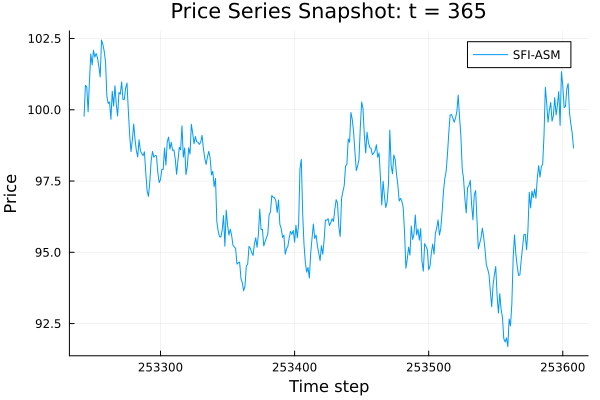

In [16]:
# plot price series - 365 t snapshot
t_range = 365
rand_snapshot = rand(1:(SS_t - t_range))
price_plot = plot(mdf[rand_snapshot:(rand_snapshot + t_range), :t], 
                        mdf[rand_snapshot:(rand_snapshot + t_range), :mdf_price],
                        xlabel = "Time step", ylabel = "Price", label = "SFI-ASM",
                        title = "Price Series Snapshot: t = $(t_range)")

### Model Validation
To validate the model, we will compare the results given by the ABM against those given by real historical OHLC data. Specifically, we will look to see how closely the ABM can replicate the *stylized facts*, i.e., empirical regularities in the data that are accepted as truth due to how consistent they are across different types of financial instruments and time periods.

#### Load the empirical dataset
Load the historical OHLC data set for Advanced Micro Devices, Inc with ticker symbol [AMD](https://finance.yahoo.com/quote/AMD?.tsrc=applewf) into a [DataFrame](https://dataframes.juliadata.org/stable/). The OHLC data is stored in a comma seperated value (CSV) file format; use the [CSV](https://csv.juliadata.org/stable/) package to read the data and load into a [DataFrame](https://dataframes.juliadata.org/stable/).

In [9]:
df = CSV.read("./data/AMD-OHLC-2020-8-25-to-2022-09-27.csv", DataFrame);

There are many [stylized facts](https://www.wolframcloud.com/objects/summerschool/pages/2017/CarlosManuelRodriguezMartinez_TE), but for time's sake we'll narrow our focus to two: volatility clustering and heavy-tailed return distributions.

#### Stylized Fact 1: Volatility Clustering
Volatility clustering describes the tendency of large changes in asset prices to follow large changes, and small changes to follow small changes. Put simply, high-volatility events tend to cluster in time.

In [10]:
# Calculate returns for the empirical dataset
emp_returns = [(df[i,"close"] - df[i,"open"]) for i in 1:nrow(df)]

# Calculate returns for the empirical dataset
data_size = length(emp_returns)
# abm_returns = [mdf[(i + 1), :mdf_price] - mdf[i, :mdf_price] for i in (nrow(mdf) - data_size):(nrow(mdf) - 1)];
abm_returns = [mdf[(i + 1), :mdf_price] - mdf[i, :mdf_price] for i in 1:data_size];

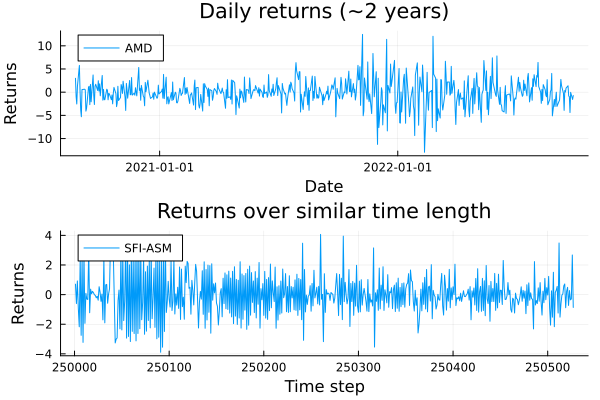

In [11]:
# number of days per year -
emp_plot = plot(Date.(df[1:end, :timestamp]), emp_returns,
    xlabel="Date", ylabel="Returns", label="AMD",
    legend_position = :topleft, title="Daily returns (~2 years)")

# abm_plot = plot(mdf[(nrow(mdf) - data_size):(nrow(mdf) - 1), :t], abm_returns,
abm_plot = plot(mdf[1:data_size, :t], abm_returns,
    xlabel="Time step", ylabel="Returns", label="SFI-ASM",
    legend_position = :topleft, title="Returns over similar time length")

plot(emp_plot, abm_plot, layout = (2, 1))

#### Stylized Fact 2: Non-Gaussian returns distribution
Stock returns are known to deviate from the normal distribution. Excess kurtosis, or "fat tails", makes assets more risky, as extreme events such as huge price hikes or drops occur more often than one would normally expect. The thing to pay attention to here is how high and narrow the peaks get and how much mass is located at the edges of the distribution. 

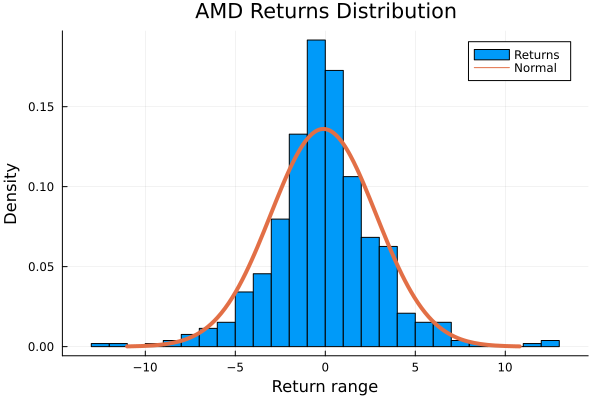

In [12]:
emp_histogram = histogram(emp_returns, normed = true,
                        xlabel="Return range", ylabel="Density",
                        label="Returns", title="AMD Returns Distribution")
emp_norm_returns = fit(Normal, emp_returns)
plot!(emp_norm_returns, lw = 4, label = "Normal")

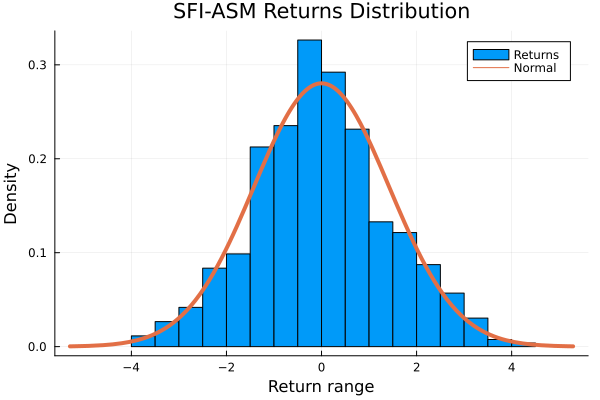

In [13]:
abm_histogram = histogram(abm_returns, normed = true,
                        xlabel="Return range", ylabel="Density",
                        label="Returns", title="SFI-ASM Returns Distribution")
abm_norm_returns = fit(Normal, abm_returns)
plot!(abm_norm_returns, lw = 4, label = "Normal")

### Limitations of ABMs
- Computational cost
- Availability of microscopic data
- Calibration
- Validation